In [1]:
import numpy as np
import skfuzzy as fuzzy
from skfuzzy import control as ctrl
import matplotlib.pyplot as plt

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


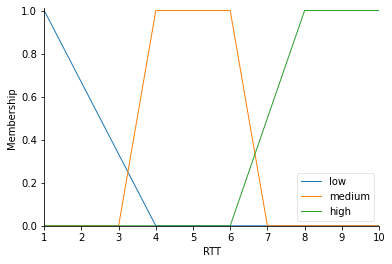

In [2]:
"""Fuzzy expert system id for Congestion detection based on round trip time and window size"""

RTT=ctrl.Antecedent(np.arange(1,11,1),'RTT')
RTT['low']=fuzzy.trimf(RTT.universe,[1,1,4])
RTT['medium']=fuzzy.trapmf(RTT.universe,[3,4,6,7])
RTT['high']=fuzzy.trapmf(RTT.universe,[6,8,10,10])
RTT.view()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


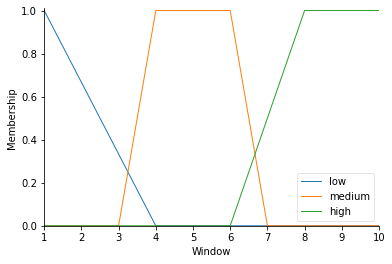

In [3]:
Window=ctrl.Antecedent(np.arange(1,11,1),'Window')
Window['low']=fuzzy.trimf(Window.universe,[1,1,4])
Window['medium']=fuzzy.trapmf(Window.universe,[3,4,6,7])
Window['high']=fuzzy.trapmf(Window.universe,[6,8,10,10])
Window.view()
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


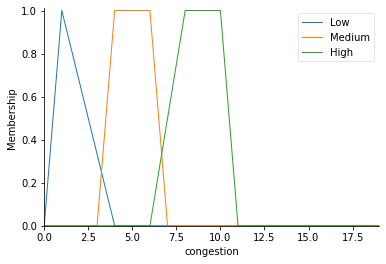

In [4]:
congestion=ctrl.Consequent(np.arange(0,20),'congestion')
congestion['Low']=fuzzy.trimf(congestion.universe,[1,1,4])
congestion['Medium']=fuzzy.trapmf(congestion.universe,[3,4,6,7])
congestion['High']=fuzzy.trapmf(congestion.universe,[6,8,10,10])
congestion.view()
plt.show()

In [8]:
rule1=ctrl.Rule(RTT['low'] & Window['low'], congestion['Low'])
rule2=ctrl.Rule(RTT['low'] & Window['medium'], congestion['Low'])
rule3=ctrl.Rule(RTT['low'] & Window['high'], congestion['High'])
rule4=ctrl.Rule(RTT['medium'] & Window['low'], congestion['Low'])
rule5=ctrl.Rule(RTT['medium'] & Window['medium'], congestion['Medium'])
rule6=ctrl.Rule(RTT['medium'] & Window['high'], congestion['Medium'])
rule7=ctrl.Rule(RTT['high'] & Window['low'], congestion['Medium'])
rule8=ctrl.Rule(RTT['high'] & Window['medium'], congestion['Medium'])
rule9=ctrl.Rule(RTT['high'] & Window['high'], congestion['High'])
rule=[rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9]

In [11]:
x=ctrl.ControlSystem(rule)
y=ctrl.ControlSystemSimulation(x)


C:\ProgramData\Anaconda3\lib\site-packages\skfuzzy\control\fuzzyvariable.py:122: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


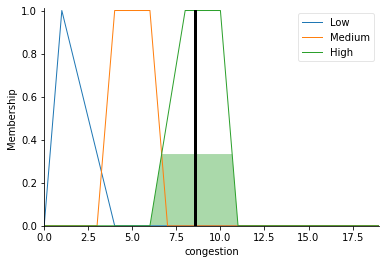

In [12]:


y.input['RTT']=3
y.input['Window']=9
y.compute()
congestion.view(sim=y)
plt.show()
